In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("dataset/train.csv", usecols=["Age", "Fare", "Survived"])

In [3]:
df.sample(10)

,Survived,Age,Fare
43,1,3.0,41.5792
418,0,30.0,13.0000
486,1,35.0,90.0000
706,1,45.0,13.5000
484,1,25.0,91.0792
667,0,NaN,7.7750
840,0,20.0,7.9250
470,0,NaN,7.2500
402,0,21.0,9.8250
49,0,18.0,17.8000


In [4]:
df["Age"].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.sample(10)

,Survived,Age,Fare
566,0,19.000000,7.8958
22,1,15.000000,8.0292
421,0,21.000000,7.7333
306,1,29.699118,110.8833
589,0,29.699118,8.0500
356,1,22.000000,55.0000
419,0,10.000000,24.1500
818,0,43.000000,6.4500
360,0,40.000000,27.9000
601,0,29.699118,7.8958


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.drop("Survived", axis="columns")
y = df["Survived"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Habib\AppData\Local\Temp\ipykernel_9604\2955672033.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


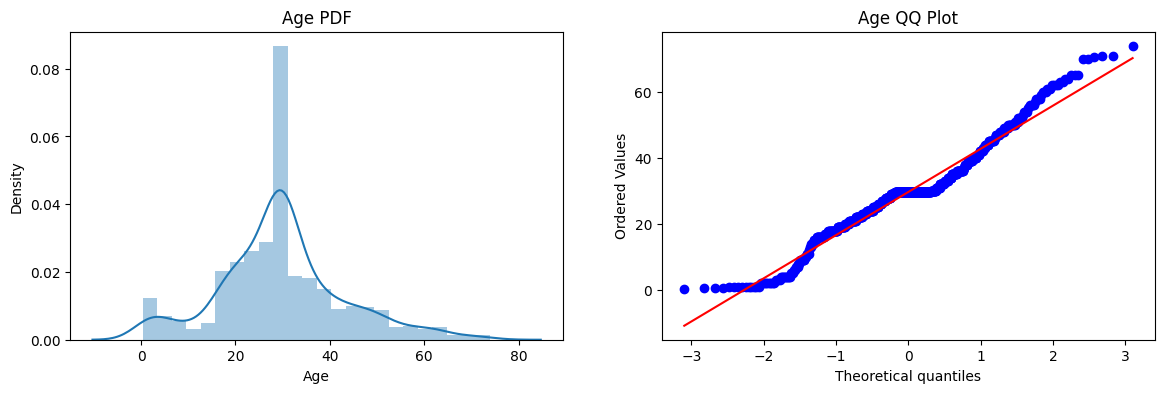

In [9]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\Habib\AppData\Local\Temp\ipykernel_9604\1623903172.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


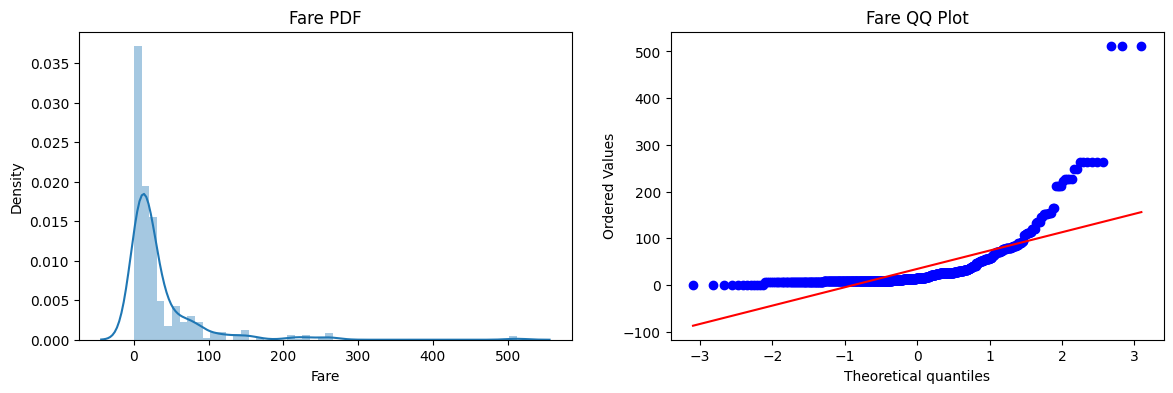

In [10]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.show()

In [11]:
trf = FunctionTransformer(func=np.log1p)

In [12]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)